# 예측

In [5]:
# 모듈 임포트
import pandas as pd
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
print(pd.__version__)
print(sns.__version__)
print(tf.__version__)

1.4.4
0.12.0
2.10.0


In [6]:
# mpg 데이터 로드
dataset=sns.load_dataset("mpg")
dataset.shape
# shape - 칼럼과 로우가 나옴

(398, 9)

In [7]:
# 결측치 처리
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
# isnull().sum() 외에 isna().sum()도 가능
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [9]:
# 결측치 삭제
# dropna - 비어있는 행을 지워줌
dataset=dataset.dropna()

In [10]:
dataset.shape

(392, 9)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [12]:
# 문자열 데이터 처리
# name 칼럼 삭제
dataset.pop("name")

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 392, dtype: object

In [13]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [14]:
# origin 열은 범주형 원-핫 인코딩으로 변환
origin=dataset.pop("origin")

In [15]:
dataset["usa"]=(origin=="usa")*1.0
dataset["europe"]=(origin=="europe")*1.0
dataset["japan"]=(origin=="japan")*1.0
dataset.tail()

C:\Users\KB\AppData\Local\Temp\ipykernel_1116\913595546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["usa"]=(origin=="usa")*1.0
C:\Users\KB\AppData\Local\Temp\ipykernel_1116\913595546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["europe"]=(origin=="europe")*1.0
C:\Users\KB\AppData\Local\Temp\ipykernel_1116\913595546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
393,27.0,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720,19.4,82,1.0,0.0,0.0


In [16]:
# 학습 - 8 - train_dataset
# 평가 - 2 - test_dataset
train_dataset=dataset.sample(frac=0.8, random_state=42)
test_dataset=dataset.drop(train_dataset.index)

In [17]:
train_dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
218,36.0,4,79.0,58.0,1825,18.6,77,0.0,1.0,0.0
281,19.8,6,200.0,85.0,2990,18.2,79,1.0,0.0,0.0
342,30.0,4,135.0,84.0,2385,12.9,81,1.0,0.0,0.0
238,33.5,4,98.0,83.0,2075,15.9,77,1.0,0.0,0.0
209,19.0,4,120.0,88.0,3270,21.9,76,0.0,1.0,0.0


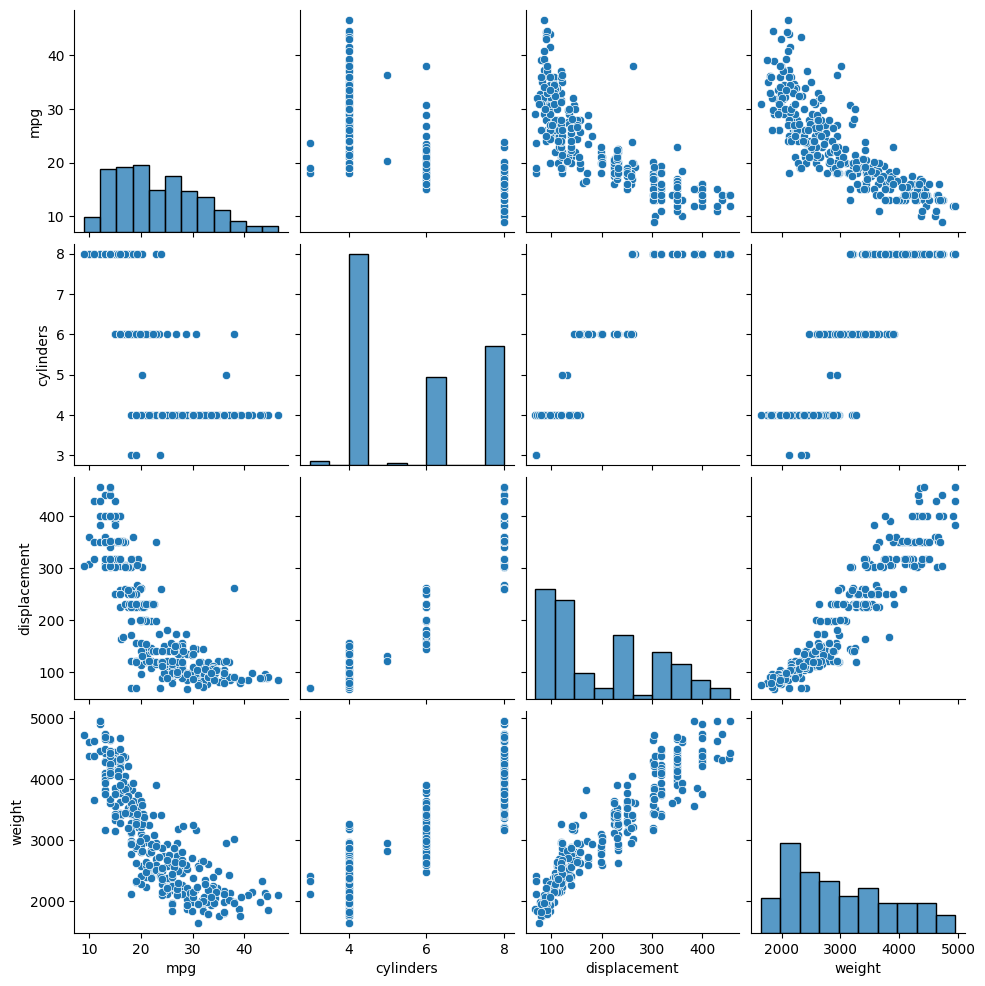

In [18]:
sns.pairplot(train_dataset[["mpg","cylinders","displacement", "weight"]])

In [20]:
# 기술 통계
train_stats=train_dataset.describe()
train_stats

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.153822,5.531847,197.855096,105.971338,3005.745223,15.510828,75.910828,0.624204,0.171975,0.203822
std,7.861854,1.729449,106.501896,39.636557,859.060925,2.803560,3.688989,0.485101,0.377961,0.403481
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,76.000000,2231.000000,13.625000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,95.000000,2831.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.075000,8.000000,302.000000,130.000000,3641.750000,17.000000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,4955.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [21]:
train_stats.pop("mpg")
train_stats

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.531847,197.855096,105.971338,3005.745223,15.510828,75.910828,0.624204,0.171975,0.203822
std,1.729449,106.501896,39.636557,859.060925,2.803560,3.688989,0.485101,0.377961,0.403481
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.000000,76.000000,2231.000000,13.625000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,95.000000,2831.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,302.000000,130.000000,3641.750000,17.000000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,4955.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [22]:
# transpose() - 행과 열을 바꿈
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.531847,1.729449,3.0,4.000,4.0,8.00,8.0
displacement,314.0,197.855096,106.501896,68.0,105.000,151.0,302.00,455.0
horsepower,314.0,105.971338,39.636557,46.0,76.000,95.0,130.00,230.0
weight,314.0,3005.745223,859.060925,1649.0,2231.000,2831.5,3641.75,4955.0
acceleration,314.0,15.510828,2.803560,8.0,13.625,15.5,17.00,24.8
model_year,314.0,75.910828,3.688989,70.0,73.000,76.0,79.00,82.0
usa,314.0,0.624204,0.485101,0.0,0.000,1.0,1.00,1.0
europe,314.0,0.171975,0.377961,0.0,0.000,0.0,0.00,1.0
japan,314.0,0.203822,0.403481,0.0,0.000,0.0,0.00,1.0


In [23]:
# 레이블 - 예측할려는 칼럼
# 특성 - 다른 칼럼
# 특성과 레이블을 분리 -> 문제와 정답으로 분리
train_labels=train_dataset.pop("mpg")
test_labels=test_dataset.pop("mpg")

In [24]:
train_dataset

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
79,4,96.0,69.0,2189,18.0,72,0.0,1.0,0.0
276,4,121.0,115.0,2795,15.7,78,0.0,1.0,0.0
248,4,91.0,60.0,1800,16.4,78,0.0,0.0,1.0
56,4,91.0,70.0,1955,20.5,71,1.0,0.0,0.0
393,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
218,4,79.0,58.0,1825,18.6,77,0.0,1.0,0.0
281,6,200.0,85.0,2990,18.2,79,1.0,0.0,0.0
342,4,135.0,84.0,2385,12.9,81,1.0,0.0,0.0
238,4,98.0,83.0,2075,15.9,77,1.0,0.0,0.0


In [25]:
train_labels.tail()

218    36.0
281    19.8
342    30.0
238    33.5
209    19.0
Name: mpg, dtype: float64

In [26]:
# 데이터 정규화 - 안 해도 상관없지만, 하면 연산속도와 예측적증률이 높아짐
def norm(x):
    return(x-train_stats["mean"])/train_stats["std"]
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

In [27]:
normed_train_data.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
218,-0.885743,-1.115990,-1.210280,-1.374460,1.101875,0.295249,-1.286751,2.190772,-0.505158
281,0.270695,0.020140,-0.529091,-0.018328,0.959199,0.837404,0.774676,-0.455006,-0.505158
342,-0.885743,-0.590178,-0.554320,-0.722586,-0.931255,1.379558,0.774676,-0.455006,-0.505158
238,-0.885743,-0.937590,-0.579549,-1.083445,0.138814,0.295249,0.774676,-0.455006,-0.505158
209,-0.885743,-0.731021,-0.453403,0.307609,2.278950,0.024172,-1.286751,2.190772,-0.505158


In [28]:
normed_test_data.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,europe,japan
381,-0.885743,-0.853084,-0.781383,-0.932117,-0.360552,1.650635,-1.286751,-0.455006,1.973274
388,-0.885743,-0.392999,-0.352486,-0.489773,-0.360552,1.650635,0.774676,-0.455006,-0.505158
391,-0.885743,-0.590178,-0.554320,-0.740047,-0.895586,1.650635,0.774676,-0.455006,-0.505158
395,-0.885743,-0.590178,-0.554320,-0.827351,-1.394951,1.650635,0.774676,-0.455006,-0.505158
397,-0.885743,-0.740410,-0.604778,-0.332625,1.387226,1.650635,0.774676,-0.455006,-0.505158


In [29]:
train_dataset.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'usa', 'europe', 'japan'],
      dtype='object')

In [30]:
len(train_dataset.keys())

9

In [31]:
# 모델 만들기 - mae(평균 절대 오차), mse(평균 제곱 오차)
def build_model():
    model=keras.Sequential([
        layers.Dense(64, input_shape=[len(train_dataset.keys())], activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    # 오답 처리 알고리즘 - 바로 밑
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])
    return model

In [33]:
# 모델 확인
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 모델 훈련
# 1000번 - 훈련 단위 1번을 에포크라고 함 에포크를 1000번 반복
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch%100==0:
            print("")
        print('.', end="")
EPOCHS=1000
model=build_model()
history=model.fit(
    normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [35]:
hist=pd.DataFrame(history.history)
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
995,2.865084,1.074598,2.865084,5.085870,1.736443,5.085870
996,3.066681,1.104584,3.066681,5.295427,1.699051,5.295427
997,3.042962,1.068739,3.042962,5.364106,1.833293,5.364106
998,3.007019,1.085232,3.007019,5.184106,1.710829,5.184106
999,3.020533,1.075553,3.020533,5.735791,1.759920,5.735791


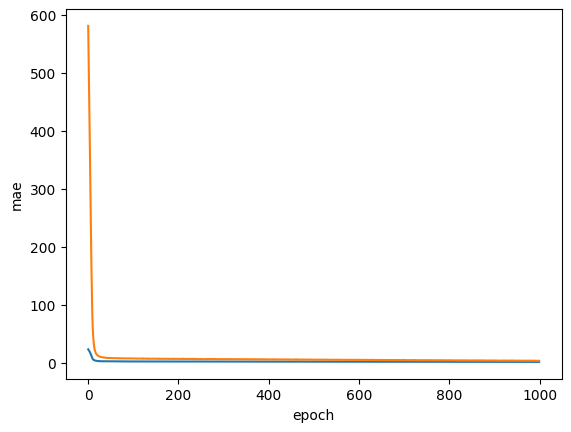

In [36]:
# 학습 1000번 가성비 
# 학습을 진행하면서 오차율을 시각화
def sns_hist(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    sns.lineplot(data=hist, x="epoch", y="mae")
    sns.lineplot(data=hist, x="epoch", y="mse")
sns_hist(history)

In [41]:
# model.fit를 수정해서 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 하는 것으로 수정(val_loss기준)
model=build_model()
early_stop=keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
history=model.fit(
    normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot(), early_stop]
)
#verbose=0 - log 안 찍는 것


....................................................................................................
.......................

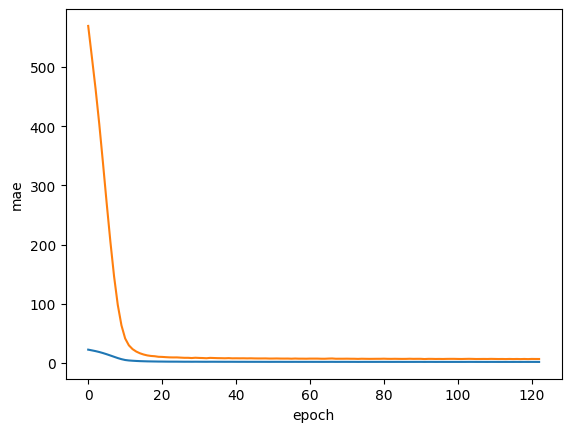

In [42]:
sns_hist(history)

In [46]:
# 성능 평가
loss, mae, mse=model.evaluate(normed_test_data, test_labels, verbose=2)
print("테스트 세트의 평균 절대 오차: ", mae, "MPG")
print("테스트 세트의 평균 절대 오차: {:.2f} MPG".format(mae))

3/3 - 0s - loss: 7.1743 - mae: 1.9593 - mse: 7.1743 - 16ms/epoch - 5ms/step
테스트 세트의 평균 절대 오차:  1.9593018293380737 MPG
테스트 세트의 평균 절대 오차: 1.96 MPG


In [48]:
# 시각화해서 평가
# 예측만 하게 할 수 있음
test_predictions=model.predict(normed_test_data).flatten()
test_predictions

3/3 [==============================] - 0s 998us/step


array([13.951657 , 15.37733  , 20.025457 , 21.65402  , 17.014435 ,
       12.14309  , 25.891092 , 23.43891  , 25.175566 , 29.073189 ,
       29.216879 , 26.35491  , 28.02416  , 13.895017 , 23.68891  ,
       13.732199 , 13.748505 , 12.831998 , 18.16987  , 13.02612  ,
       12.276602 , 18.766958 , 20.203234 , 22.496119 , 13.867568 ,
       27.197174 , 16.993055 , 15.469146 , 15.517667 , 21.739042 ,
       22.566349 , 18.048723 , 15.890016 , 14.5167265, 18.645094 ,
       18.089487 , 19.409454 , 30.759312 , 20.738974 , 15.286742 ,
       31.171711 , 25.411142 , 29.87514  , 24.601427 , 34.101208 ,
       19.263777 , 21.793516 , 20.719397 , 18.637484 , 16.372694 ,
       29.960213 , 21.321907 , 21.845186 , 19.570337 , 31.87183  ,
       32.682213 , 23.69517  , 24.380747 , 27.24839  , 36.039547 ,
       32.70331  , 22.869768 , 33.324795 , 32.12394  , 34.11309  ,
       21.644281 , 36.784878 , 36.395626 , 30.835325 , 23.945868 ,
       23.764618 , 24.644308 , 36.019512 , 34.638424 , 28.7062

<AxesSubplot:xlabel='mpg'>

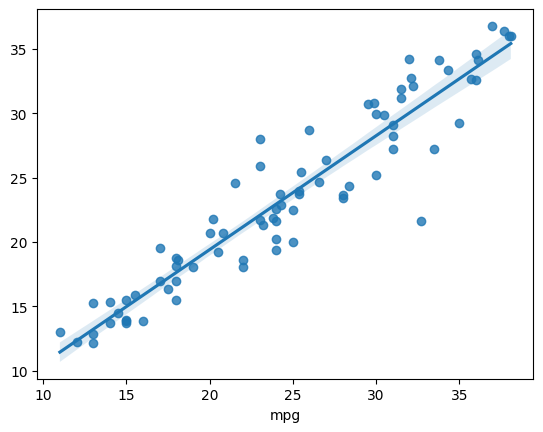

In [49]:
sns.regplot(x=test_labels, y=test_predictions)

<AxesSubplot:xlabel='mpg'>

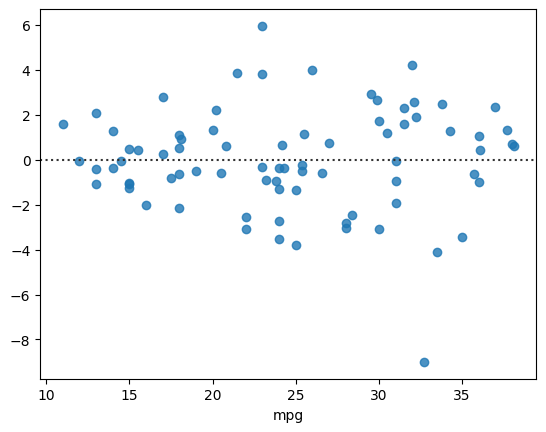

In [50]:
sns.residplot(x=test_labels, y=test_predictions)

In [51]:
# 오차 분포
error=test_predictions-test_labels
error.tail()

381   -1.361576
388    2.706293
391   -3.423664
395    2.221264
397   -2.788271
Name: mpg, dtype: float64

<AxesSubplot:>

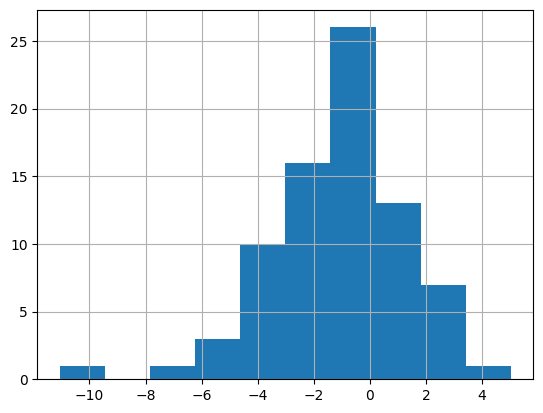

In [52]:
error.hist()